In [ ]:
from sentence_transformers import SentenceTransformer
import pandas as pd
model = SentenceTransformer("all-mpnet-base-v2")
import json


In [3]:
# load the all atributes data dict
with open('../data/books/all_attributs.json', 'r') as f:
    all_attributes = json.load(f)
print("Number of books: ", len(all_attributes))

Number of books:  33962


In [10]:
# create a list of sentences from the attributes of the books and encode them with the model
import re
pattern = r'[,\|]'
sentences = []
for book_id in all_attributes.keys() :
    sentence = ""
    for key in all_attributes[book_id]:
        element = re.sub(pattern, '', all_attributes[book_id][key]) 
        sentence += element + ","
    sentences.append(sentence)
# encode the sentences
embeddings = model.encode(sentences)

# store the embeddings in the dataframe
embeddings = pd.DataFrame(embeddings, index=all_attributes.keys(), columns=[f'{i}' for i in range(768)])
      

In [15]:
# store the embeddings to pickle file 
#embeddings.to_pickle('../data/books/books_attributes_embeddings.pkl')

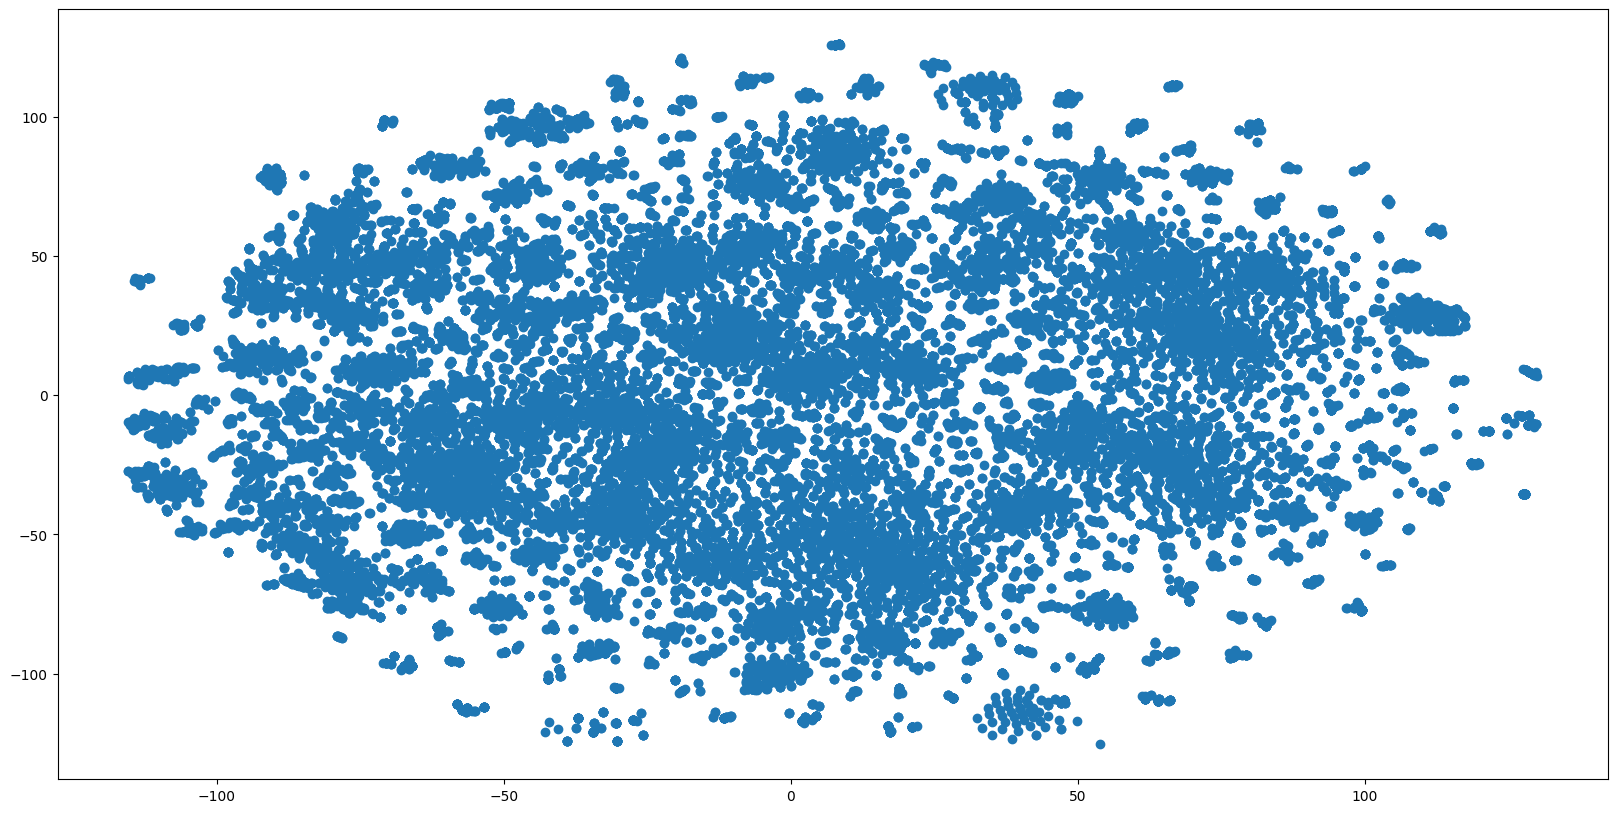

In [45]:
# reduce the dimensionality of the embeddings to 2 dimensions with t-SNE
from sklearn.manifold import TSNE
tsne = TSNE(n_components=2)
tsne_embeddings = tsne.fit_transform(embeddings)
# plot the embeddings
import matplotlib.pyplot as plt
plt.figure(figsize=(20,10))
plt.scatter(tsne_embeddings[:,0], tsne_embeddings[:,1])
plt.show()